Step1:import and setup

In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


#Step2 - Importing the dataset from kaggle to google collab

In [ ]:
#install kaggle APi
#!pip install kaggle

In [ ]:
#create a directory as kaggle
#! mkdir -p ~/.kaggle

In [ ]:
# import file
from google.colab import files
uploaded = files.upload()

In [ ]:
# copy Api key to kaggle directory
#! cp kaggle.json ~/.kaggle

In [ ]:
# diable the API key
#! chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# list of dataset
#! kaggle datasets list

ref                                                  title                                       size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -----------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                      DAIGT V2 Train Dataset                      29MB  2023-11-16 01:38:36           3002        251  1.0              
muhammadbinimran/housing-price-prediction-data       Housing Price Prediction Data              763KB  2023-11-21 17:56:32          12664        218  1.0              
rishabhkarn/ipl-auction-2023                         IPL Auction 2023                             4KB  2023-12-24 10:45:03            666         25  0.9411765        
bhavikjikadara/car-price-prediction-dataset          Car Price Prediction Dataset                 4KB  2023-12-23 07:07:54           1208         33  0.9411765 

In [ ]:
# import the dataset
#! kaggle datasets download -d mlg-ulb/creditcardfraud

In [ ]:
#unzipping dataset
#! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
dataset_1 = pd.read_csv('/content/creditcard.csv')

In [ ]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Step3: Data Preporcessing

In [ ]:
dataset_1.shape

(284807, 31)

In [ ]:
#checking the null vaue
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# obsevation in each class
dataset_1['Class'].value_counts()
# this dataset is highly unbalanced

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# balance the dataset
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']== 0]


In [ ]:
fraud.shape , non_fraud.shape

((492, 31), (284315, 31))

In [ ]:
# random selection of sample
non_fraud_t = non_fraud.sample(n = 492)

In [ ]:
non_fraud_t.shape

(492, 31)

In [ ]:
# merge dataset by definfing new dataset
dataset = fraud.append(non_fraud_t , ignore_index=True)

<ipython-input-197-b47a238eaa42>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = fraud.append(non_fraud_t , ignore_index=True)


In [ ]:
print(dataset)

         Time         V1        V2        V3        V4        V5        V6  \
0       406.0  -2.312227  1.951992 -1.609851  3.997906 -0.522188 -1.426545   
1       472.0  -3.043541 -3.157307  1.088463  2.288644  1.359805 -1.064823   
2      4462.0  -2.303350  1.759247 -0.359745  2.330243 -0.821628 -0.075788   
3      6986.0  -4.397974  1.358367 -2.592844  2.679787 -1.128131 -1.706536   
4      7519.0   1.234235  3.019740 -4.304597  4.732795  3.624201 -1.357746   
..        ...        ...       ...       ...       ...       ...       ...   
979   43811.0  -0.941442 -0.376981  0.646919 -1.001561  0.804479 -0.993375   
980  162121.0 -10.801369 -9.929054 -4.235146  1.694755  2.777832 -4.062184   
981  113113.0   1.953861 -0.212581 -1.622575 -0.016194  0.860895  0.694299   
982   60133.0  -0.363260  1.134170  1.429554  0.139726 -0.139391 -1.174086   
983   69425.0  -1.442526 -4.865904 -0.015155  2.252325 -2.705093  0.848915   

           V7        V8        V9  ...       V21       V22     

In [ ]:
#observation in each class to see the balanced dataset in each category
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
# mtatrix of features

In [ ]:
x= dataset.drop(labels= ['Class'] , axis = 1)

In [ ]:
# dependent variable

y = dataset['Class']

In [ ]:
x.shape , y.shape

((984, 30), (984,))

In [ ]:
# splitting the dataset into test and train dataset
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 , random_state = 0)

In [ ]:
x_train.shape , x_test.shape
x_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
894,141804.0,-0.917838,-0.251842,1.407473,-0.396156,-0.136359,-0.660721,0.190219,0.153872,0.678537,...,0.286714,0.339574,0.885791,0.092226,0.066604,-0.321814,0.598912,0.320781,0.240385,99.99
158,47923.0,0.364377,1.443523,-2.220907,2.036985,-1.237055,-1.728161,-2.058582,0.358895,-1.393306,...,0.310980,0.402730,-0.132129,-0.032977,0.460861,0.560404,0.409366,0.539668,0.296918,0.76
154,46149.0,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,...,0.221919,0.609508,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1.00
40,17220.0,1.189784,0.942289,0.082334,3.024050,0.412406,-0.214415,0.053558,-0.110353,0.883798,...,-0.143435,-0.502636,-1.047398,-0.056752,-0.340688,0.541235,-0.098300,-0.003041,0.049819,3.79
793,82106.0,1.414509,-1.374434,1.110627,-1.292125,-1.924839,0.155440,-1.663920,0.190239,-1.269849,...,-0.297170,-0.206737,-0.079484,0.005699,0.004305,0.258025,-0.193665,0.073010,0.020769,22.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,120367.0,-0.285720,1.025023,0.573817,-0.688464,0.616769,-0.977183,1.192575,-0.241311,-0.347256,...,0.059381,-0.208794,-0.378620,0.015751,0.012521,-0.585022,0.134492,0.361318,0.239370,7.48
192,58067.0,-0.264869,3.386140,-3.454997,4.367629,3.336060,-2.053918,0.256890,-2.957235,-2.855797,...,0.482513,-1.394504,-0.166029,-1.452081,-0.251815,1.243461,0.452787,0.132218,0.424599,1.00
629,36355.0,-1.001679,1.162466,1.109780,-0.684129,0.177975,-0.397473,0.353168,0.614021,-0.840098,...,-0.299896,-0.074249,-0.476970,0.012605,-0.052333,-0.356307,-0.110199,-0.060884,0.045985,1.98
559,120106.0,-0.194992,1.153425,0.245224,2.642069,0.740099,0.760382,2.219037,-0.357424,-1.891012,...,-0.161071,-0.086836,-0.148945,0.016915,-0.519639,-0.291272,-0.277735,-0.189289,-0.247386,207.55


In [ ]:
# feature scaling
from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train.shape , x_test.shape

((787, 30), (197, 30))

In [ ]:

#y_train = y_train.to_numpy
#y_test = y_test.to_numpy
print(type(y_train))

<class 'pandas.core.series.Series'>


In [ ]:
x_train = x_train.reshape(787 ,30 ,1)
x_test = x_test.reshape(197 ,30 ,1)

#Step:4 Building the model

In [ ]:
#defining an object
model = tf.keras.models.Sequential()

In [ ]:
# First CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(30, 1)))
# Batch normalization
model.add(tf.keras.layers.BatchNormalization())
# Maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))
#dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# Second CNN layer
model.add(tf.keras.layers.Conv1D(filters = 64 , kernel_size =2 , padding ='same' , activation ='relu' ))
#batch normalization
model.add(tf.keras.layers.BatchNormalization())
#maxpool layer
model.add(tf.keras.layers.MaxPooling1D(pool_size = 2))
#dropout layer
model.add(tf.keras.layers.Dropout(0.3)) # ignoring 30 percent neuron

In [ ]:
# flatten layers
model.add(tf.keras.layers.Flatten()) # flatten layer convert array into vector

In [ ]:
# first dense layer this our fully connected layer
model.add(tf.keras.layers.Dense(units = 64 , activation ='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))



In [ ]:
#output layer
model.add(tf.keras.layers.Dense(units=1 , activation ="sigmoid"))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 30, 32)            96        
                                                                 
 batch_normalization_10 (Ba  (None, 30, 32)            128       
 tchNormalization)                                               
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 15, 32)            0         
 ng1D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 15, 32)            0         
                                                                 
 conv1d_11 (Conv1D)          (None, 15, 64)            4160      
                                                                 
 batch_normalization_11 (Ba  (None, 15, 64)           

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate =0.0001)

In [ ]:
model.compile(optimizer = opt , loss ='binary_crossentropy' , metrics =['accuracy'])

#Step5: Training model

In [ ]:
history =model.fit(x_train , y_train , epochs =25 , validation_data =(x_test,y_test) )

Epoch 1/25
25/25 [==============================] - 3s 28ms/step - loss: 0.7653 - accuracy: 0.5832 - val_loss: 0.6470 - val_accuracy: 0.7614
Epoch 2/25
25/25 [==============================] - 0s 10ms/step - loss: 0.6029 - accuracy: 0.7116 - val_loss: 0.6121 - val_accuracy: 0.7970
Epoch 3/25
25/25 [==============================] - 0s 13ms/step - loss: 0.4870 - accuracy: 0.7776 - val_loss: 0.5822 - val_accuracy: 0.8173
Epoch 4/25
25/25 [==============================] - 0s 14ms/step - loss: 0.4413 - accuracy: 0.8208 - val_loss: 0.5490 - val_accuracy: 0.8122
Epoch 5/25
25/25 [==============================] - 0s 15ms/step - loss: 0.4124 - accuracy: 0.8259 - val_loss: 0.5161 - val_accuracy: 0.8274
Epoch 6/25
25/25 [==============================] - 0s 12ms/step - loss: 0.3614 - accuracy: 0.8653 - val_loss: 0.4780 - val_accuracy: 0.8426
Epoch 7/25
25/25 [==============================] - 0s 14ms/step - loss: 0.3614 - accuracy: 0.8742 - val_loss: 0.4392 - val_accuracy: 0.8579
Epoch 8/25
25

In [ ]:
# model prediction
#y_pred = model.predict(x_test)
y_pred_probs = model.predict(x_test)

# Threshold the predicted probabilities to obtain predicted classes (0 or 1)
y_pred = (y_pred_probs > 0.5).astype(int)
print(y_pred[10])


7/7 [==============================] - 0s 3ms/step
[0]


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
print(cm)

[[105   1]
 [  8  83]]


In [ ]:
# accuracy on the basis of confusion matrix
acc_cm = accuracy_score(y_test , y_pred)
print(acc_cm)

0.9543147208121827


In [ ]:
# learning curve
def learning_curve(history , epoch):

  #training vs  validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range , history.history['accuracy'])
  plt.plot(epoch_range , history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train' , 'val'] , loc ='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range , history.history['loss'])
  plt.plot(epoch_range , history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel("Loss")
  plt.xlabel("Epoch")
  plt.legend(['Train' ,'val'] , loc = 'upper left')
  plt.show()


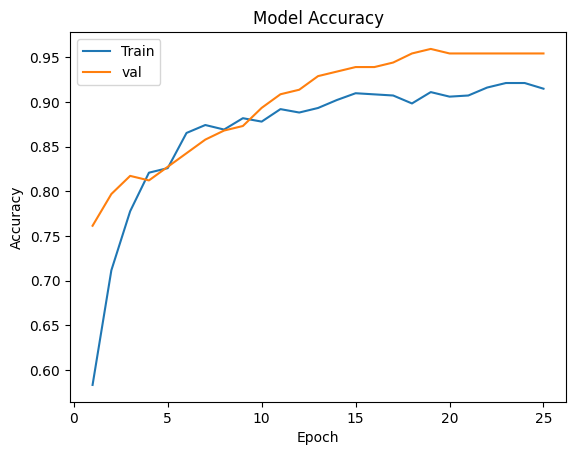

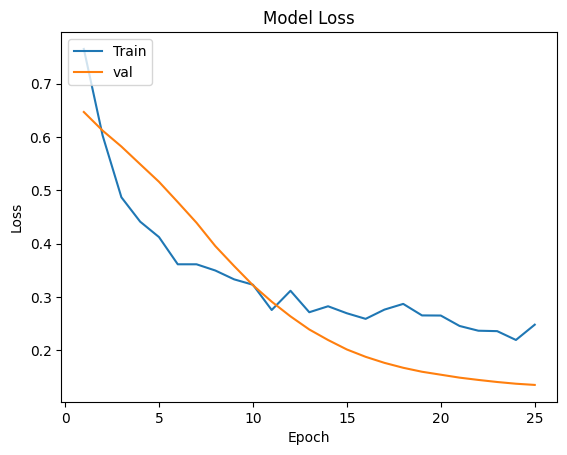

In [ ]:
learning_curve(history ,epoch =25)